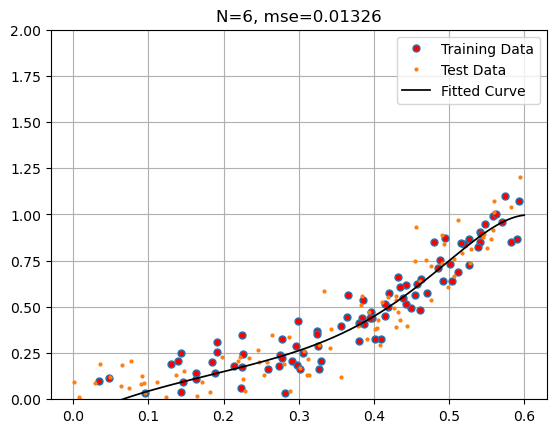

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(234)

# Generate training data
M_train = 100
sigma = 0.1
x_train = np.random.uniform(0, 0.6, M_train)
# Note: np.polyval expects coefficients in descending order (highest power first)
p_coeff = [0.1, 3, 1, 0.2, 0.01]
y_theory_train = np.polyval(p_coeff, x_train)
y_train = y_theory_train + sigma * np.random.randn(M_train)

# Generate test data
M_test = 100
x_test = np.random.uniform(0, 0.6, M_test)
y_theory_test = np.polyval(p_coeff, x_test)
y_test = y_theory_test + 0.1 * np.random.randn(M_test)

# Define polynomial regression functions
def polynomial_regression_weights(x, y, N):
    """
    Compute polynomial regression weights for a polynomial of degree N.
    Returns the predicted values and weights.
    """
    # Build the design matrix with powers 0,1,...,N (increasing order)
    X = np.vander(x, N + 1, increasing=True)
    # Compute the pseudo-inverse and then the weights
    w = np.linalg.lstsq(X, y)[0]
    yh = X @ w
    return yh, w

def polynomial_regression_values(x, w):
    """
    Compute polynomial regression predictions given data x and weights w.
    """
    N = len(w) - 1
    X = np.vander(x, N + 1, increasing=True)
    yh = X @ w
    return yh

# Set polynomial degree and compute weights using training data
N = 6
_, w = polynomial_regression_weights(x_train, y_train, N)

# Evaluate on test data and compute MSE
yh_test = polynomial_regression_values(x_test, w)
mse_N = np.linalg.norm(yh_test - y_test) ** 2 / M_test

# For plotting: generate smooth x values and compute predictions
x_theory = np.arange(0, 0.6001, 0.001)
yh_curve = polynomial_regression_values(x_theory, w)

# Plot results
plt.figure(1)
plt.plot(x_train, y_train, 'o', markersize=5, markerfacecolor='r', label='Training Data')
plt.plot(x_test, y_test, 'o', markersize=2, label='Test Data')
plt.plot(x_theory, yh_curve, '-', linewidth=1.25, color='k', label='Fitted Curve')
plt.ylim([0, 2])
plt.title(f'N={N}, mse={mse_N:.5f}')
plt.grid(True)
plt.legend()
plt.show()


MSE (no regularization, high N): 211.5090755303573
MSE (no regularization, small N): 0.015252565700134606
MSE (regularized, high N): 0.01461827232175442


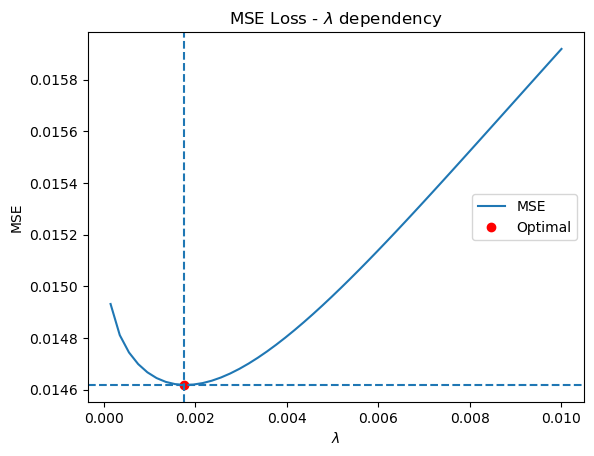

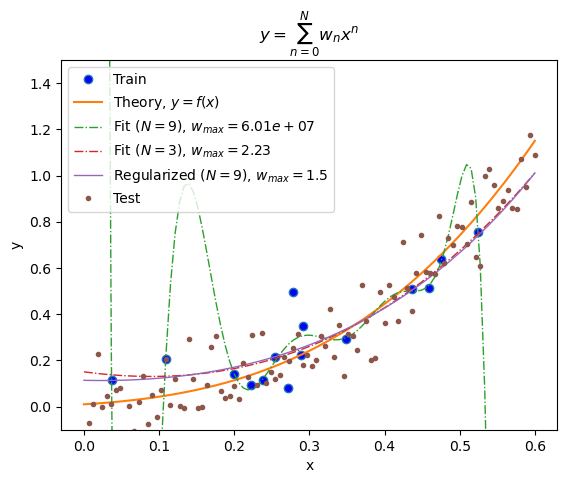

In [2]:
# ------------------------------
# Dataset Generation
# ------------------------------
M_train = 15   # train dataset size
sigma = 0.1    # noise standard deviation

# Generate training data: uniformly distributed in [0, 0.6]
x_train = np.random.uniform(0, 0.6, M_train)
p_coeff = [0.1, 3, 1, 0.2, 0.01]  # theoretical polynomial coefficients (highest power first)
y_theory_train = np.polyval(p_coeff, x_train)  # theoretical function y = f(x)
y_train = y_theory_train + sigma * np.random.randn(M_train)  # add Gaussian noise

# Generate test data for plotting purposes
M_test = 100  # test dataset size
x_test = np.linspace(0, 0.6, M_test)
y_theory_test = np.polyval(p_coeff, x_test)
y_test = y_theory_test + 0.1 * np.random.randn(M_test)

# ------------------------------
# Polynomial Regression Functions
# ------------------------------
def polynomial_regression_weights(x, y, N, reg_lambda=0):
    """
    Computes the polynomial regression weights for a polynomial of degree N with optional regularization.

    Parameters:
        x : array-like, shape (M,)
            Input data.
        y : array-like, shape (M,)
            Target values.
        N : int
            Order of the polynomial.
        reg_lambda : float, optional
            Regularization constant (default is 0, i.e. no regularization).

    Returns:
        w  : array, shape (N+1,)
            Optimal weights.
        yh : array, shape (M,)
            Predicted y values based on the weights.
    """
    x = np.asarray(x).flatten()
    # Build design matrix X with columns [x^0, x^1, ..., x^N]
    X = np.vander(x, N + 1, increasing=True)

    if reg_lambda == 0:
        # No regularization: use the pseudo-inverse for the minimum-norm solution
        w = np.linalg.lstsq(X, y, rcond=None)[0]
    else:
        # With regularization (do not penalize the bias term)
        G = reg_lambda * np.eye(N + 1)
        G[0, 0] = 0  # no penalty on the bias term
        w = np.linalg.solve(X.T @ X + G, X.T @ y)

    yh = X @ w
    return w, yh

def polynomial_regression_values(x, w):
    """
    Computes the predicted y values for input x given the polynomial regression weights w.

    Parameters:
        x : array-like, shape (M,)
            Input data.
        w : array, shape (N+1,)
            Polynomial weights.

    Returns:
        yh : array, shape (M,)
            Predicted y values.
    """
    x = np.asarray(x).flatten()
    N = len(w) - 1
    X = np.vander(x, N + 1, increasing=True)
    yh = X @ w
    return yh

# ------------------------------
# Model Evaluation
# ------------------------------
reg_lambda = 0.01  # regularization parameter (for later use)
N_high = 9

# No regularization, high-order polynomial (N_high)
w, yh = polynomial_regression_weights(x_train, y_train, N_high, reg_lambda=0)
MSE_highN = np.linalg.norm(y_test - polynomial_regression_values(x_test, w))**2 / M_test
print("MSE (no regularization, high N):", MSE_highN)

N_small = 3
# No regularization, lower-order polynomial (N_small)
w3, yh_small = polynomial_regression_weights(x_train, y_train, N_small, reg_lambda=0)
MSE_smallN = np.linalg.norm(y_test - polynomial_regression_values(x_test, w3))**2 / M_test
print("MSE (no regularization, small N):", MSE_smallN)

# Regularization: optimize lambda
lambda_vals = np.linspace(1.5e-4, 0.01, 50)  # 50 values from 1.5e-4 to 0.01
mse_vals = []
for lamb in lambda_vals:
    w_poly_reg, _ = polynomial_regression_weights(x_train, y_train, N_high, reg_lambda=lamb)
    yh_mse = polynomial_regression_values(x_test, w_poly_reg)
    mse_vals.append(np.mean((y_test - yh_mse) ** 2))
mse_vals = np.array(mse_vals)
mse_optimal = mse_vals.min()
idx = mse_vals.argmin()
lambda_optimal = lambda_vals[idx]

# Plot MSE vs. lambda
plt.figure(2)
plt.plot(lambda_vals, mse_vals, label='MSE')
plt.plot(lambda_optimal, mse_optimal, 'or', markerfacecolor='r', label='Optimal')
plt.axvline(x=lambda_optimal, linestyle='--')
plt.axhline(y=mse_optimal, linestyle='--')
plt.xlabel(r'$\lambda$')
plt.ylabel('MSE')
plt.title(r'MSE Loss - $\lambda$ dependency')
plt.legend()
plt.savefig('linear_fit_poly_lambda.pdf', bbox_inches='tight')

# Compute weights with optimal regularization
w_r, _ = polynomial_regression_weights(x_train, y_train, N_high, reg_lambda=lambda_optimal)
yh_r = polynomial_regression_values(x_test, w_r)
MSE_highN_reg = np.linalg.norm(y_test - yh_r)**2 / M_test
print("MSE (regularized, high N):", MSE_highN_reg)

# ------------------------------
# Plotting the Results
# ------------------------------
plt.figure(1)
plt.clf()

# Plot training data
plt.plot(x_train, y_train, 'o', markerfacecolor='b', label='Train')
# Plot the theoretical function y = f(x)
plt.plot(x_test, y_theory_test, linewidth=1.5, label=r'Theory, $y=f(x)$')
# Regression without regularization, high-order model
plt.plot(x_test, polynomial_regression_values(x_test, w), '-.', linewidth=1,
         label=r'Fit ($N='+str(N_high)+r'$), $w_{max}='+f"{np.max(w):.3g}"+'$')
# Regression without regularization, lower-order model
plt.plot(x_test, polynomial_regression_values(x_test, w3), '-.', linewidth=1,
         label=r'Fit ($N='+str(N_small)+r'$), $w_{max}='+f"{np.max(w3):.3g}"+'$')
# Regression with regularization
plt.plot(x_test, polynomial_regression_values(x_test, w_r), linewidth=1,
         label=r'Regularized ($N='+str(N_high)+r'$), $w_{max}='+f"{np.max(w_r):.3g}"+'$')
# Plot test data
plt.plot(x_test, y_test, '.', label='Test')

plt.ylim([-0.1, 1.5])
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$y=\sum_{n=0}^N w_nx^n$')
plt.legend(loc='best')
plt.savefig('linear_fit_poly_reg.pdf', bbox_inches='tight')
plt.show()